Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:

data_dir_train = pathlib.Path("drive/MyDrive/ds/ISIC/Train")
data_dir_test = pathlib.Path('drive/MyDrive/ds/ISIC/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:

train, validation = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'both',
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  label_mode='int',
  class_names=None,
  color_mode='rgb',
  shuffle=True
  )

train_ds = train

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Using 447 files for validation.


In [8]:
val_ds = validation

In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Code to visualize one instance of all the nine classes present in the dataset

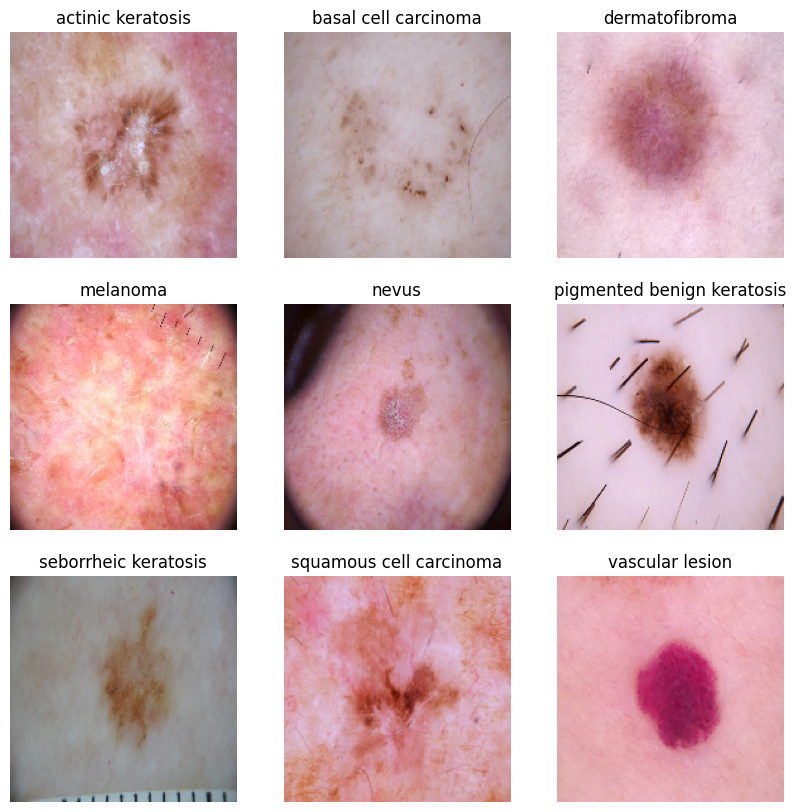

In [10]:
import matplotlib.pyplot as plt
s_d_type = {}
for images, labels in train_ds.take(2):
  for image, label in zip(images, labels):
    s_d_type.update({label.numpy(): image.numpy().astype("uint8")})

plt.figure(figsize=(10, 10))
for key, val in s_d_type.items():
  ax = plt.subplot(3, 3, key + 1)
  plt.imshow(val)
  plt.title(class_names[key])
  plt.axis("off")



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [43]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [67]:
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(.4))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [68]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
# View the summary of all layers
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 180, 180, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 180, 180, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 180, 180, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 90, 90, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 90, 90, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 90, 90, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 90, 90, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 45, 45, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 45, 45, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 45, 45, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 45, 45, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 22, 22, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 22, 22, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 22, 22, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 22, 22, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 11, 11, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 968)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │          31,008 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,409 (130.50 KB)

 Trainable params: 33,345 (130.25 KB)

 Non-trainable params: 64 (256.00 B)

### Train the model

In [70]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 868ms/step - accuracy: 0.2725 - loss: 3.2664 - val_accuracy: 0.0940 - val_loss: 2.3364
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 48s 861ms/step - accuracy: 0.4118 - loss: 1.8737 - val_accuracy: 0.1477 - val_loss: 2.5015
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 888ms/step - accuracy: 0.4394 - loss: 1.7585 - val_accuracy: 0.2058 - val_loss: 2.5453
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 80s 865ms/step - accuracy: 0.5031 - loss: 1.5166 - val_accuracy: 0.2416 - val_loss: 2.3434
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 48s 859ms/step - accuracy: 0.4970 - loss: 1.5412 - val_accuracy: 0.2685 - val_loss: 2.3066
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 870ms/step - accuracy: 0.5570 - loss: 1.3884 - val_accuracy: 0.3244 - val_loss: 1.9796
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 871ms/step - accuracy: 0.5464 - loss: 1.3378 - val_accuracy: 0.3557 - val_loss: 1.9400
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 48s 863ms/step - accuracy: 0.5866 - loss: 1.2199 - val_accu

### Visualizing training results

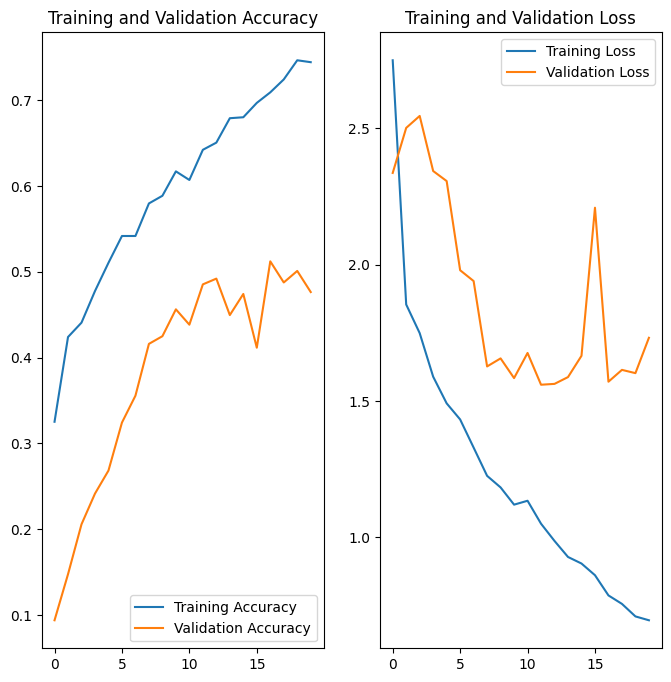

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***Observation:***   Model is a over fit the accuracy in tain being around 74% and close to 50% on validation after the 20th epoch.

The model is overfit as accuracy on validation set is low. Although its not an extreme overfit.

The reason could be the model is too complex or data is not sufficient for train the model.




### Findings:

Looking ar the chart below if we run more epoch the accuracy on train and validation would increase as the lines seems increasing in linear levels.

Augmenting train data set might bring down overfitting. Using Flip, Rotation and Zoom.  

In [10]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(.2),
    layers.RandomZoom(.5, .2)
]

def data_augmentation(image):
  for layer in data_augmentation_layers:
    image = layer(image)
  return image

agumented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

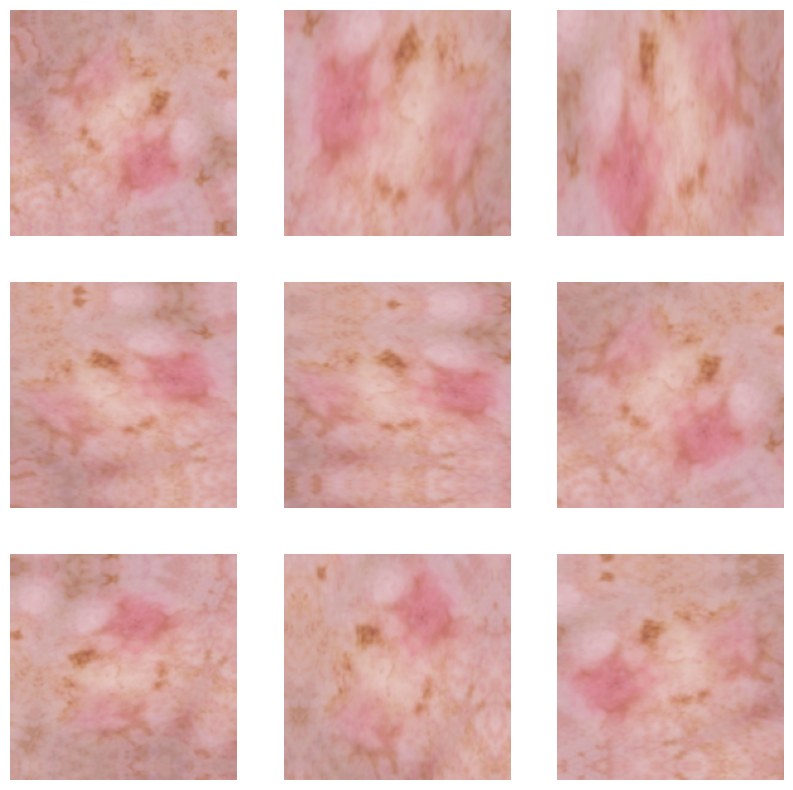

In [13]:
#tf.get_logger().setlevel('ERROR')

plt.figure(figsize=(10, 10))
for image, _ in agumented_train_ds.take(2):
  for i in range(9):
    aug_image = data_augmentation(image)
    ax = plt.subplot(3 , 3 , i + 1)
    plt.imshow(np.array(aug_image[0]).astype('uint8'))
    plt.axis("off")

### Create the model, compile and train the model


In [14]:
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(.4))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [17]:
## note: train your model for 20 epochs

epochs = 20
history = model.fit(
  agumented_train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 429s 8s/step - accuracy: 0.2184 - loss: 3.3162 - val_accuracy: 0.0895 - val_loss: 2.4583
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.3102 - loss: 2.3576 - val_accuracy: 0.0805 - val_loss: 2.5672
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3698 - loss: 1.9233 - val_accuracy: 0.1275 - val_loss: 2.5559
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4024 - loss: 1.8848 - val_accuracy: 0.0738 - val_loss: 2.5959
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4138 - loss: 1.6985 - val_accuracy: 0.1298 - val_loss: 2.3922
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4353 - loss: 1.7163 - val_accuracy: 0.2416 - val_loss: 2.7029
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.4512 - loss: 1.5918 - val_accuracy: 0.2729 - val_loss: 2.1742
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4604 - loss: 1.5576 - val_accuracy: 0.2774 - val_loss

### Visualizing the results

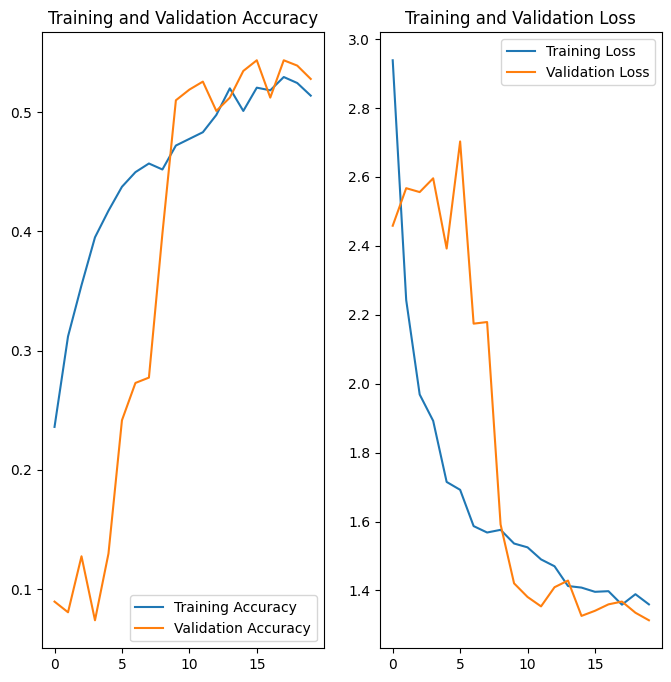

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### After agumenting the training data model is a more general and the train accuracy and validation accuracy is close. Augmenting improved the fit. although if we run the model for more epochs, accuracy may improve.

#### Distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [66]:
from glob import glob
lesion_list = pd.DataFrame([os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))])
lesion_list.value_counts()

,count
0,
pigmented benign keratosis,462
melanoma,438
basal cell carcinoma,376
nevus,357
squamous cell carcinoma,181
vascular lesion,139
actinic keratosis,114
dermatofibroma,95
seborrheic keratosis,77



#### - Which class has the least number of samples?  **"seborrheic keratosis"**
#### - Which classes dominate the data in terms proportionate number of samples? **"pigmented benign keratosis and melanoma"**


#### Class imbalance rectification using augmentor library.
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [17]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="drive/MyDrive/ds/ISIC/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78395AE37FA0>: 100%|██████████| 500/500 [00:19<00:00, 25.94 Samples/s]


Initialised with 376 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78396D30BA00>: 100%|██████████| 500/500 [00:18<00:00, 27.09 Samples/s]


Initialised with 95 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7839DB8D5570>: 100%|██████████| 500/500 [00:20<00:00, 24.90 Samples/s]


Initialised with 438 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x78395AFACFD0>: 100%|██████████| 500/500 [01:33<00:00,  5.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=966x645 at 0x78395AEDB490>: 100%|██████████| 500/500 [01:19<00:00,  6.26 Samples/s]


Initialised with 462 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78395AF18C70>: 100%|██████████| 500/500 [00:18<00:00, 27.56 Samples/s]


Initialised with 77 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78396D3B89D0>: 100%|██████████| 500/500 [00:40<00:00, 12.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78395AE3A6E0>: 100%|██████████| 500/500 [00:19<00:00, 25.09 Samples/s]


Initialised with 139 image(s) found.
Output directory set to drive/MyDrive/ds/ISIC/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78395AFAD570>: 100%|██████████| 500/500 [00:20<00:00, 24.65 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['drive/MyDrive/ds/ISIC/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028765.jpg_57b5f1f2-5894-4f4f-a15d-d6105f2670dd.jpg',
 'drive/MyDrive/ds/ISIC/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027146.jpg_92d49c65-d424-4e6b-8948-6ebfd2e1c8d7.jpg',
 'drive/MyDrive/ds/ISIC/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0028765.jpg_09e06016-b427-4097-bae1-dfa03b74d29d.jpg',
 'drive/MyDrive/ds/ISIC/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025513.jpg_a176ebeb-c3ae-4ed8-903e-ca662d13ef09.jpg',
 'drive/MyDrive/ds/ISIC/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0024829.jpg_49898d50-e5e9-4267-b0b6-be7a5ce86175.jpg',
 'drive/MyDrive/ds/ISIC/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0030145.jpg_6452789d-ec0f-4bbc-80dc-de9d1e63d076.jpg',
 'drive/MyDrive/ds/ISIC/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025530.jpg_e345931

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [ ]:
new_df['Label'].value_counts()

,count
Label,
basal cell carcinoma,500
melanoma,500
vascular lesion,500
seborrheic keratosis,500
squamous cell carcinoma,500
actinic keratosis,500
pigmented benign keratosis,500
dermatofibroma,500
nevus,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [72]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

All output directories were moved and was restructured to be used for the below code to work.

In [73]:
data_dir_train=pathlib.Path("drive/MyDrive/ds/ISIC/aug")
train_aug, validate_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'both',
  image_size=(img_height, img_width),
  batch_size=batch_size)

train_ds = train_aug


Found 4500 files belonging to 9 classes.
Using 3600 files for training.
Using 900 files for validation.


#### **Todo:** Create a validation dataset

In [74]:
val_ds = validate_aug

#### Using same model as previous with rescaling normalization

In [75]:
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(.4))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

#### Compile your model (Optimizer = adam and loss function = sparse_categorical_crossentropy)

In [76]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Train your model

In [77]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.2031 - loss: 2.9215 - val_accuracy: 0.1233 - val_loss: 2.2510
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.4112 - loss: 1.6930 - val_accuracy: 0.1367 - val_loss: 2.4567
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.4788 - loss: 1.4707 - val_accuracy: 0.3333 - val_loss: 1.8823
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.5295 - loss: 1.2999 - val_accuracy: 0.3022 - val_loss: 1.8011
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.5670 - loss: 1.2486 - val_accuracy: 0.4522 - val_loss: 1.4862
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5659 - loss: 1.1879 - val_accuracy: 0.5756 - val_loss: 1.1951
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6180 - loss: 1.0906 - val_accuracy: 0.4511 - val_loss: 1.5122
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.6628 - loss: 0.9519 - val_accu

#### **Todo:**  Visualize the model results

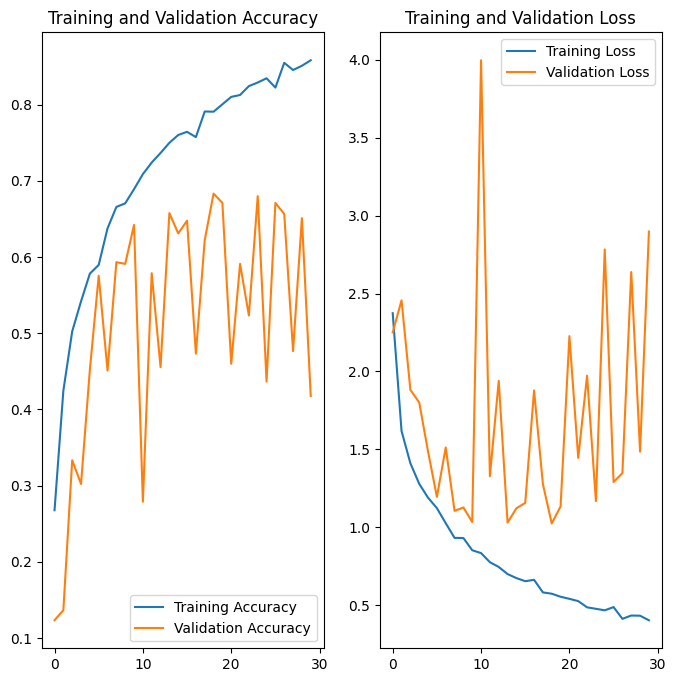

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### We did not get rid of overfitting. The levels got reduced though. Class rebalance helped but not to the extent which was expected. More experimented are required over augmented data to apply another layer of augmentation / transformation to generate more effective augmented dataset.

Exausted all the GPU credits on Google collab couldn't run those experiments.
Further more augmentation layers can be explored to increase the accuracy and explainability of the model.

